## Spam Classification

#### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

#### Problem 1.1 – Loading the Dataset

In [ ]:
dataset = pd.read_csv("/kaggle/input/email-hamspam-dataset/emails.csv")
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
#How many emails are in the dataset? 
len(dataset)

5728

In [ ]:
#How many of the emails are spam? 
sum(dataset["spam"] == 1)

1368

In [ ]:
dataset['length'] = dataset['text'].apply(len)
dataset.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [ ]:
ham = dataset[dataset['spam']==0]

In [ ]:
spam = dataset[dataset['spam']==1]

<AxesSubplot:ylabel='Frequency'>

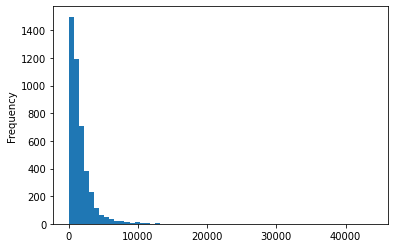

In [ ]:
ham['length'].plot(bins=60, kind='hist') 

<AxesSubplot:ylabel='Frequency'>

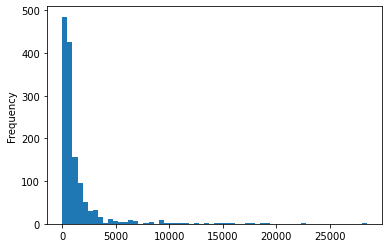

In [ ]:
spam['length'].plot(bins=60, kind='hist') 

In [ ]:
dataset.length.describe() 

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [ ]:
# Let's see the longest message 43952
dataset[dataset['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

#### Problem 2.1 -Preparing the Corpus 

In [ ]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
dataset_clean = dataset['text'].apply(message_cleaning)

In [ ]:
#Which word appears at the beginning of every email in the dataset? Respond as a lower-case  word with punctuation removed.
for i in range(0,10):
    print(dataset_clean[i][0].lower())

subject
subject
subject
subject
subject
subject
subject
subject
subject
subject


In [ ]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
spamham_countvectorizer = vectorizer.fit_transform(dataset['text'])

In [ ]:
spamham_countvectorizer.shape

(5728, 37229)

#### Problem 3.1 – Building machine learning models 

In [ ]:
X = spamham_countvectorizer
y = label

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Classification - Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

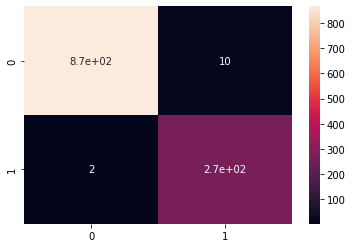

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       877
           1       0.96      0.99      0.98       269

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



#### Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
# n_estimators = No. of trees in the forest
# criterion = basis of making the decision tree split, either on gini impurity('gini'), or on infromation gain('entropy')
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

<AxesSubplot:>

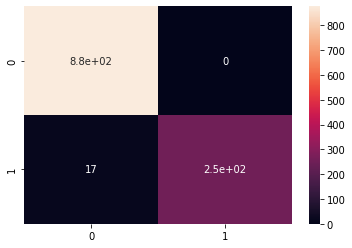

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       877
           1       1.00      0.94      0.97       269

    accuracy                           0.99      1146
   macro avg       0.99      0.97      0.98      1146
weighted avg       0.99      0.99      0.98      1146



#### Support Vector Classifier

In [ ]:
svc = SVC()         
svc.fit(X_train,y_train)
y_pred2 = svc.predict(X_test)

<AxesSubplot:>

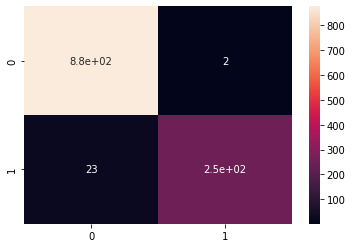

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       877
           1       0.99      0.91      0.95       269

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

